In [2]:
import os
import time
import scipy
import glob
import importlib

import pandas as pd
import numpy as np

import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

from datetime import datetime

In [3]:
import utils as util
import behavior as butil

In [4]:
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/plume-tracking/utils.py'>

In [5]:
util.set_sns_style(style='dark')

# Set src dir

In [9]:
root_dir = '/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data'
experiment = '45-degree_strip/reinforced'

src_dir = os.path.join(root_dir.split('/My Drive')[1], experiment)
src_dir

save_dir = '/Users/julianarhee/Documents/rutalab/data/figures/{}'.format(experiment)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)
print(save_dir)

/Users/julianarhee/Documents/rutalab/data/figures/45-degree_strip/reinforced


In [10]:
log_files = sorted([k for k in glob.glob(os.path.join(root_dir, experiment, '*.log'))\
                if 'lossed tracking' not in k], key=util.natsort)
print("Found {} tracking files.".format(len(log_files)))

for fi, fpath in enumerate(log_files):
    dfn = fpath.split('{}/'.format(experiment))[1]
    print(fi, dfn)

Found 12 tracking files.
0 08142020-231529_45degOdorRightReinforced.log
1 08162020-142000_45degOdorRight_Reinforced.log
2 08192020-195147_45degRightReinforcement.log
3 08192020-234523_45degOdorReinforced.log
4 08202020-165148_45degOdor_reinforced.log
5 08212020-161351_45degOdorRight_reinforced.log
6 08212020-185046_45degOdorRight_reinforced.log
7 08212020-214143_45degOdorRight_Reinforced.log
8 08242020-203413_45degOdorRight_reinforced.log
9 08242020-222507_45degOdorRight_reinforced.log
10 08242020-235308_45degOdorRight_reinforced.log
11 08252020-012321_45degOdorRight_Reinforced.log


In [11]:
dpi=300
hue_varname='instrip'
palette={True: 'w', False: 'r'}
start_at_odor = True
strip_width=10
odor_lc='lightgray'
odor_lw=0.5
nrows = 4
ncols = 3

In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


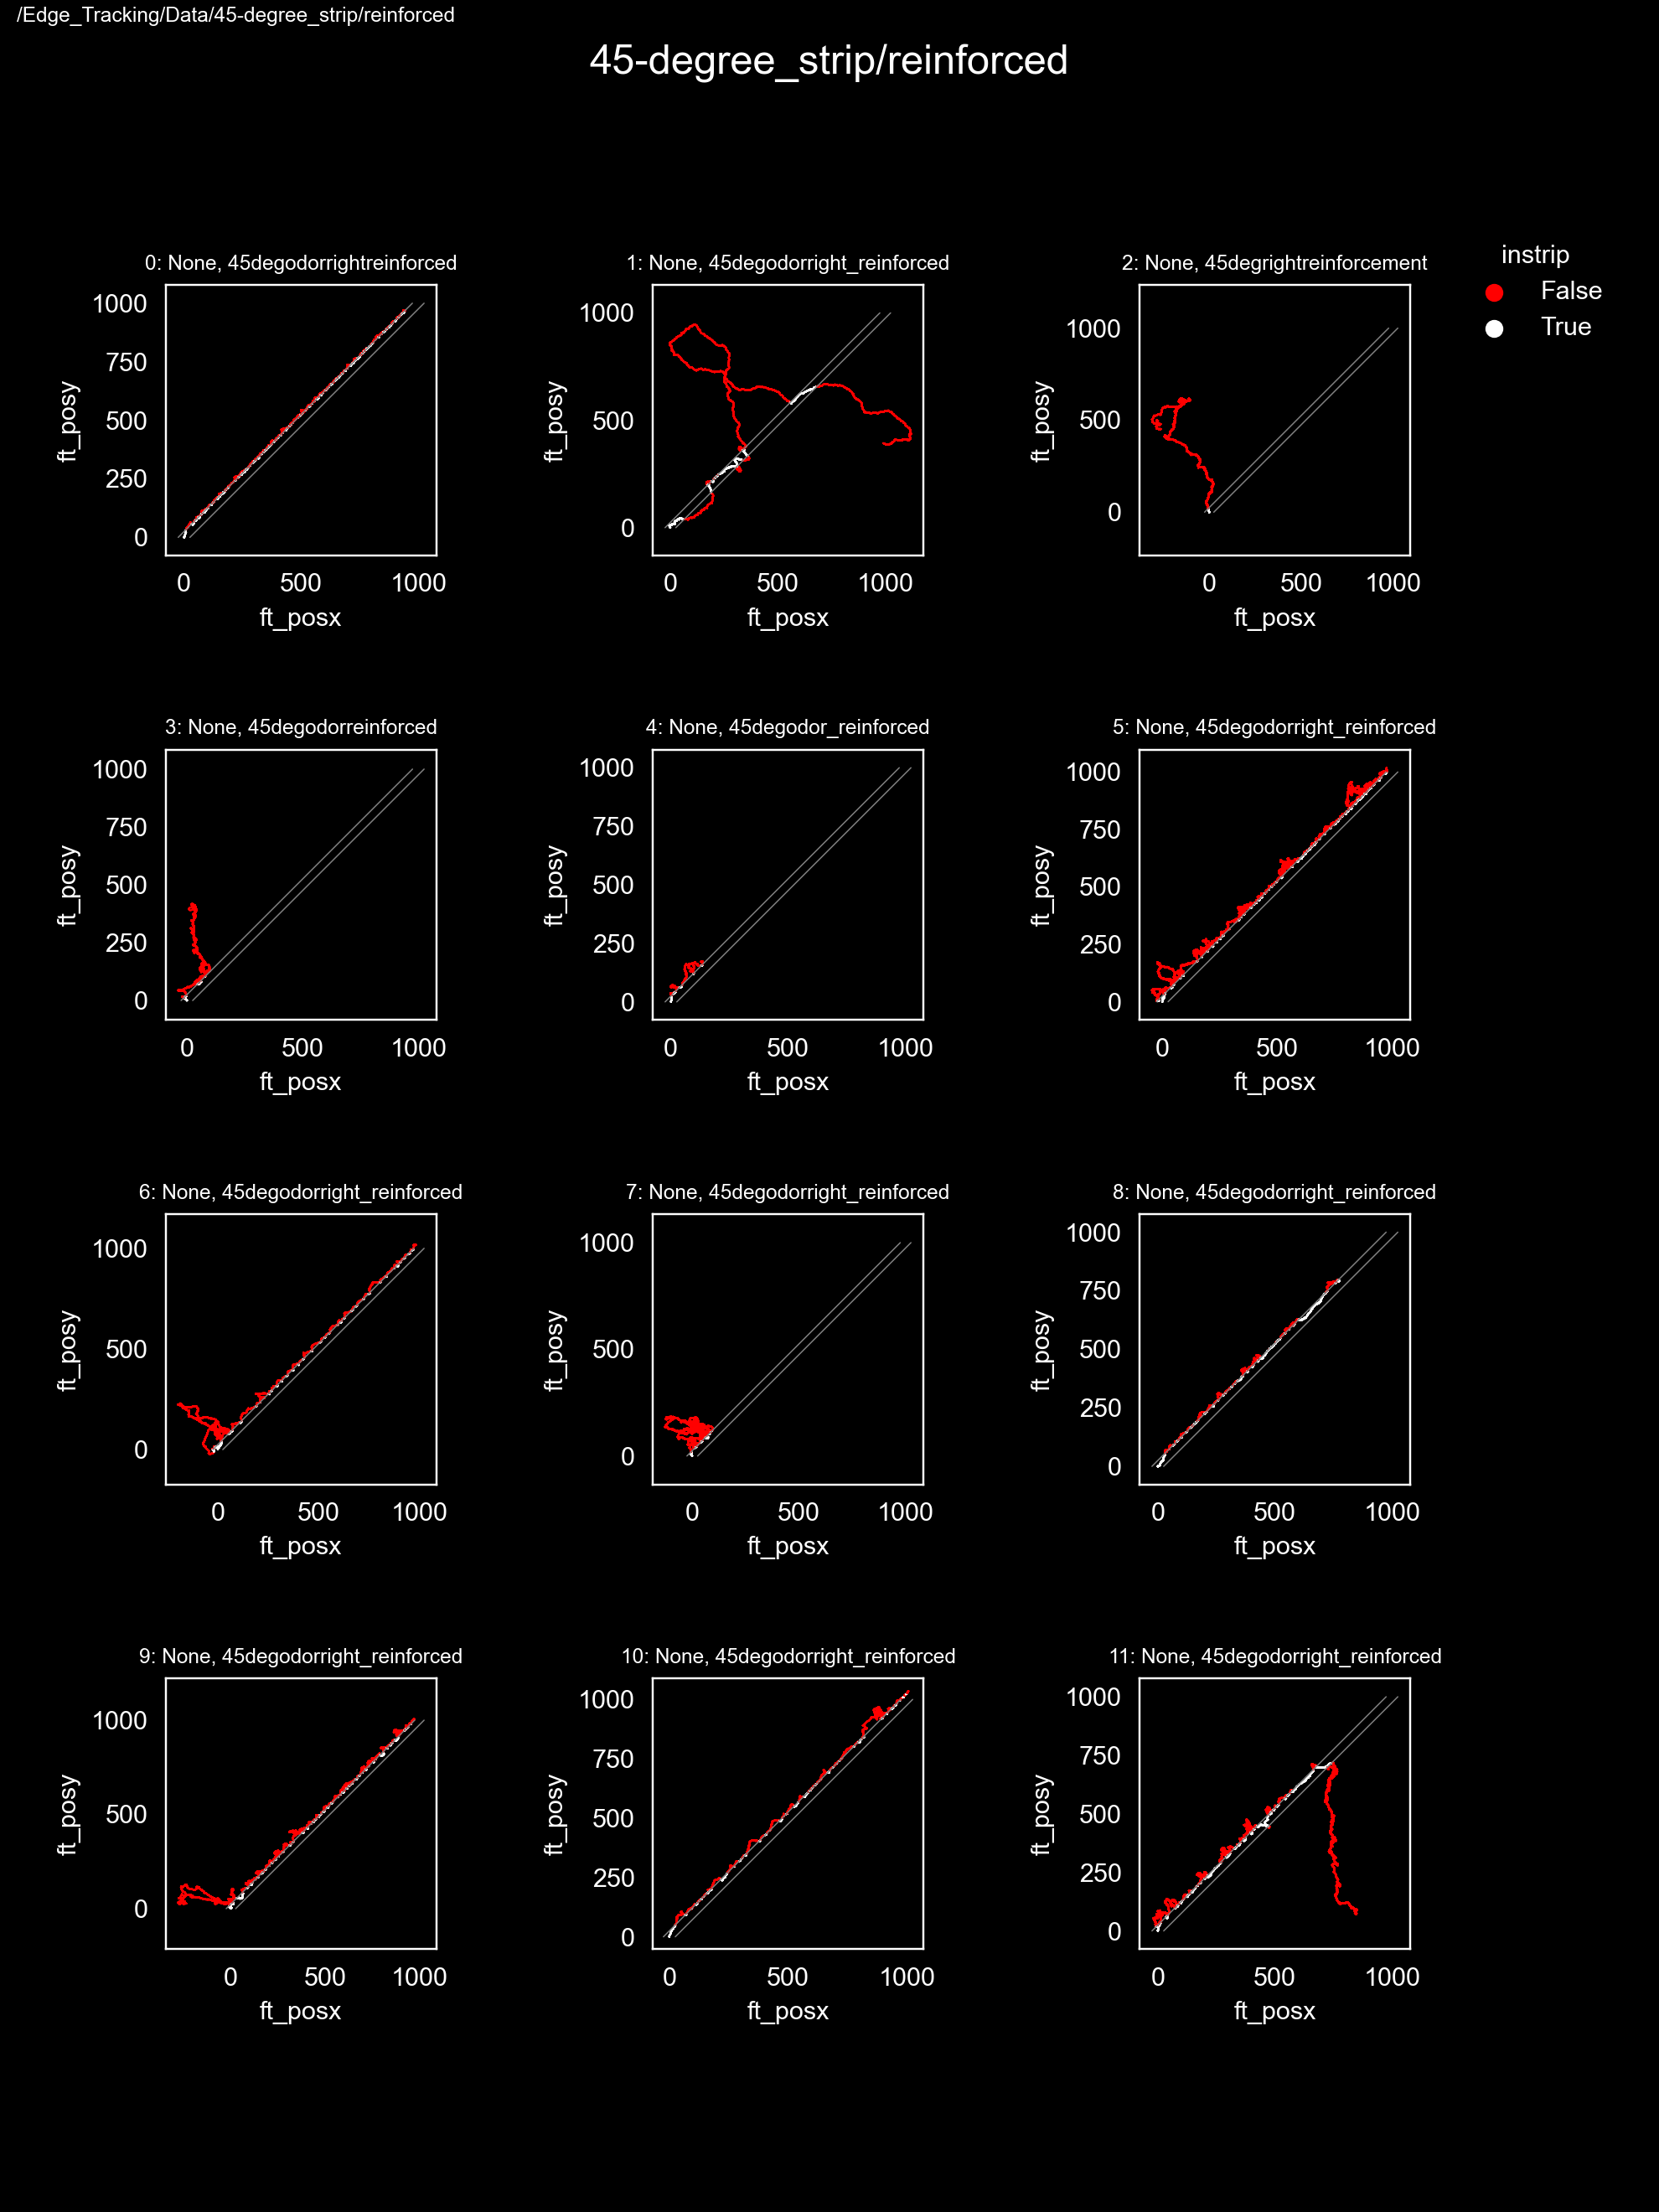

In [20]:
xmin, xmax = (-500, 500)
ymin, ymax = (-100, 1000)
odor_xmin, odor_xmax = (-100, 100)
fig, axes = pl.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(ncols*3, nrows*3))
fig.patch.set_facecolor('k')
ai = 0
for fi, fpath in enumerate(log_files):
    # load data
    _, fly_id, cond = butil.parse_info_from_file(fpath)
    df0 = butil.load_dataframe(fpath, mfc_id=None) #')
    if fly_id is None:
        df0['fly_id'] = 'fly%i' % fi
    assert len(df0['instrip'].unique())==2, "Fly never in odor. Checking other MFC vars."
    # get odor params
    odor_params = butil.get_odor_params(df0, strip_width=strip_width)
    odor_xmin, odor_xmax = odor_params['odor_boundary']
    odor_start_posx, odor_start_posy = odor_params['odor_start_pos']
    plotdf = df0[df0['time']>=odor_params['odor_start_time']] if start_at_odor else df0
    # set subplot
    #dfn = fpath.split('{}/'.format(condition))[1]
    title = '{}: {}, {}'.format(fi, fly_id, cond)
    ax = axes.flat[ai]
    ax.set_title(title, fontsize=8)
    # plot
    sns.scatterplot(data=plotdf, x='ft_posx', y='ft_posy', hue=hue_varname,
                    palette=palette, s=0.5, ax=ax, linewidth=0, alpha=1) #'none')
    ax.get_legend().remove()
    # add odor corridor
    butil.plot_45deg_corridor(ax)
    ax.set_aspect('equal')
    ax.set_box_aspect(1)
    ai+=1
# remove unused axes
for ix in np.arange(fi+1, nrows*ncols):
    axes.flat[ix].axis('off')

# legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.98, 0.9), ncol=1,
           loc='upper right', title=hue_varname, frameon=False)
# adjust plots
pl.subplots_adjust(hspace=0.5, wspace=0.8, left=0.1, right=0.85)
fig.suptitle(experiment, fontsize=16)

util.label_figure(fig, src_dir)

figname = '45deg_trajectories_all_flies'
figpath = os.path.join(save_dir, '{}.png'.format(figname)) #, dpi=dpi)
pl.savefig(figpath)

In [15]:
importlib.reload(butil)

<module 'behavior' from '/Users/julianarhee/Repositories/plume-tracking/behavior.py'>

In [17]:
butil.parse_info_from_file(fpath)

('45-degree_strip/reinforced', None, '45degodorrightreinforced')

In [14]:
fpath

'/Users/julianarhee/Library/CloudStorage/GoogleDrive-edge.tracking.ru@gmail.com/My Drive/Edge_Tracking/Data/45-degree_strip/reinforced/08142020-231529_45degOdorRightReinforced.log'

In [99]:
importlib.reload(util)

<module 'utils' from '/Users/julianarhee/Repositories/plume-tracking/utils.py'>

In [220]:
# mfc_vars = [c for c in df0.columns if 'mfc' in c \
#             and len(df0[c].unique())>1 and df0[c].dtype=='float64'] #'float64'))]
# mfc_vars
fpath = log_files[5]
try:
    df0 = butil.load_dataframe(fpath, mfc_id=None) #')
    assert len(df0['instrip'].unique())==2, "Fly never in odor. Checking other MFC vars."
except AssertionError:
    mfc_ids_check = [c for c in mfc_vars if c!=mfc_id]

<IPython.core.display.Javascript object>


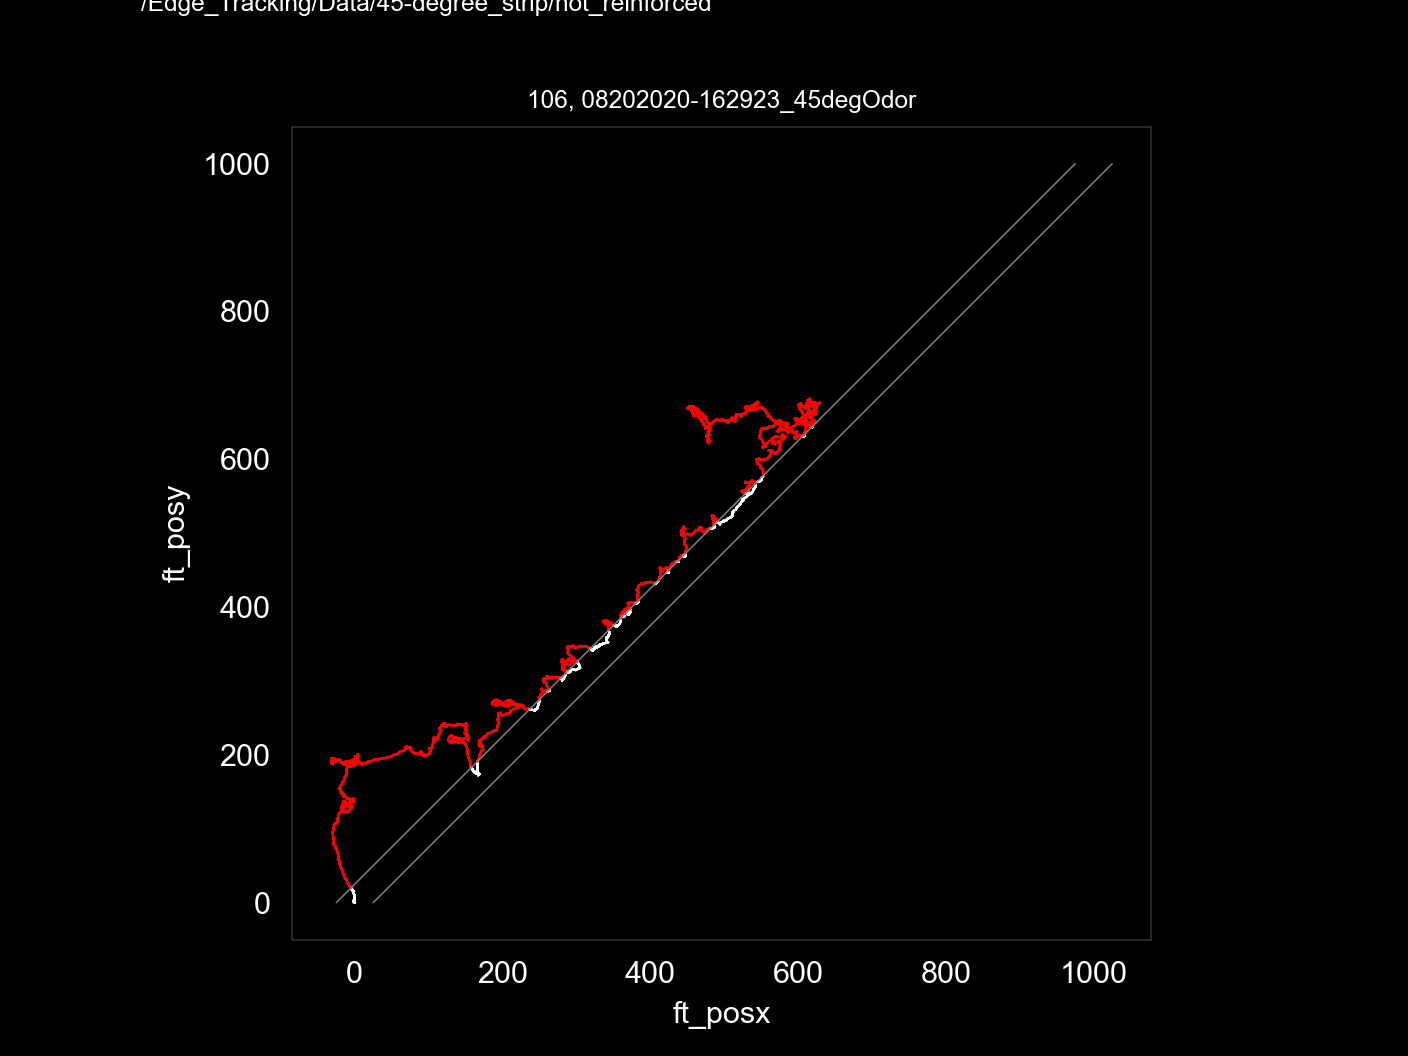

/Users/julianarhee/Documents/rutalab/data/figures/45deg_08202020-162923_45degOdor_trajectory


In [225]:
fig, ax = pl.subplots()
# get odor params
odor_params = butil.get_odor_params(df0, strip_width=strip_width)
odor_xmin, odor_xmax = odor_params['odor_boundary']
odor_start_posx, odor_start_posy = odor_params['odor_start_pos']
plotdf = df0[df0['time']>=odor_params['odor_start_time']] if start_at_odor else df0
# set subplot
dfn = os.path.splitext(fpath.split('{}/'.format(condition))[1])[0]
title = '{}, {}'.format(fi, dfn)
ax.set_title(title, fontsize=8)
# plot
sns.scatterplot(data=plotdf, x='ft_posx', y='ft_posy', hue=hue_varname,
                palette=palette, s=0.5, ax=ax, linewidth=0, alpha=1) #'none')
ax.get_legend().remove()
ax.set_aspect('equal')
butil.plot_45deg_corridor(ax)
util.label_figure(fig, src_dir)
figpath = os.path.join(save_dir, '45deg_{}_trajectory'.format(dfn))
pl.savefig(figpath)
print(figpath)

In [226]:
df = df0.copy()
# parse in and out bouts
df = butil.parse_bouts(df, count_varname='instrip', bout_varname='boutnum') # 1-count
# filter in and out bouts by min. duration 
bout_thresh=0.5
df = butil.filter_bouts_by_dur(df, bout_thresh=bout_thresh, bout_varname='boutnum', 
                        count_varname='instrip', verbose=False)
# check if any too short
boutdurs = butil.get_bout_durs(df, bout_varname='boutnum')
too_short = [k for k, v in boutdurs.items() if v<0.5]
assert len(too_short)==0, "Bad filtering, still have {} too-short bouts".format(len(too_short))

In [227]:
boutdurs

{1: 7.44308614730835,
 2: 223.1888120174408,
 3: 10.15482783317566,
 4: 58.264102935791016,
 5: 5.130272150039673,
 6: 7.073060989379883,
 7: 0.9175450801849365,
 8: 15.64913010597229,
 9: 2.1801681518554688,
 10: 15.728912830352783,
 11: 4.1299498081207275,
 12: 14.083317041397095,
 13: 14.265821933746338,
 14: 19.359199047088623,
 15: 2.466403007507324,
 16: 3.096713066101074,
 17: 9.040802955627441,
 18: 2.7795698642730713,
 19: 3.413857936859131,
 20: 8.540149927139282,
 21: 0.7330379486083984,
 22: 6.212378025054932,
 23: 0.7479779720306396,
 24: 9.805759906768799,
 25: 5.22501802444458,
 26: 4.1808130741119385,
 27: 1.595728874206543,
 28: 3.4278359413146973,
 29: 1.1499218940734863,
 30: 23.306638956069946,
 31: 0.9983289241790771,
 32: 7.107980012893677,
 33: 19.86186194419861,
 34: 7.956712961196899,
 35: 2.449449062347412,
 36: 6.158512115478516,
 37: 1.8989498615264893,
 38: 71.73207092285156,
 39: 1.3823020458221436,
 40: 548.8175358772278}

In [112]:
outbouts = df[~df['instrip']]['boutnum'].unique()
outbouts

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40])

<IPython.core.display.Javascript object>


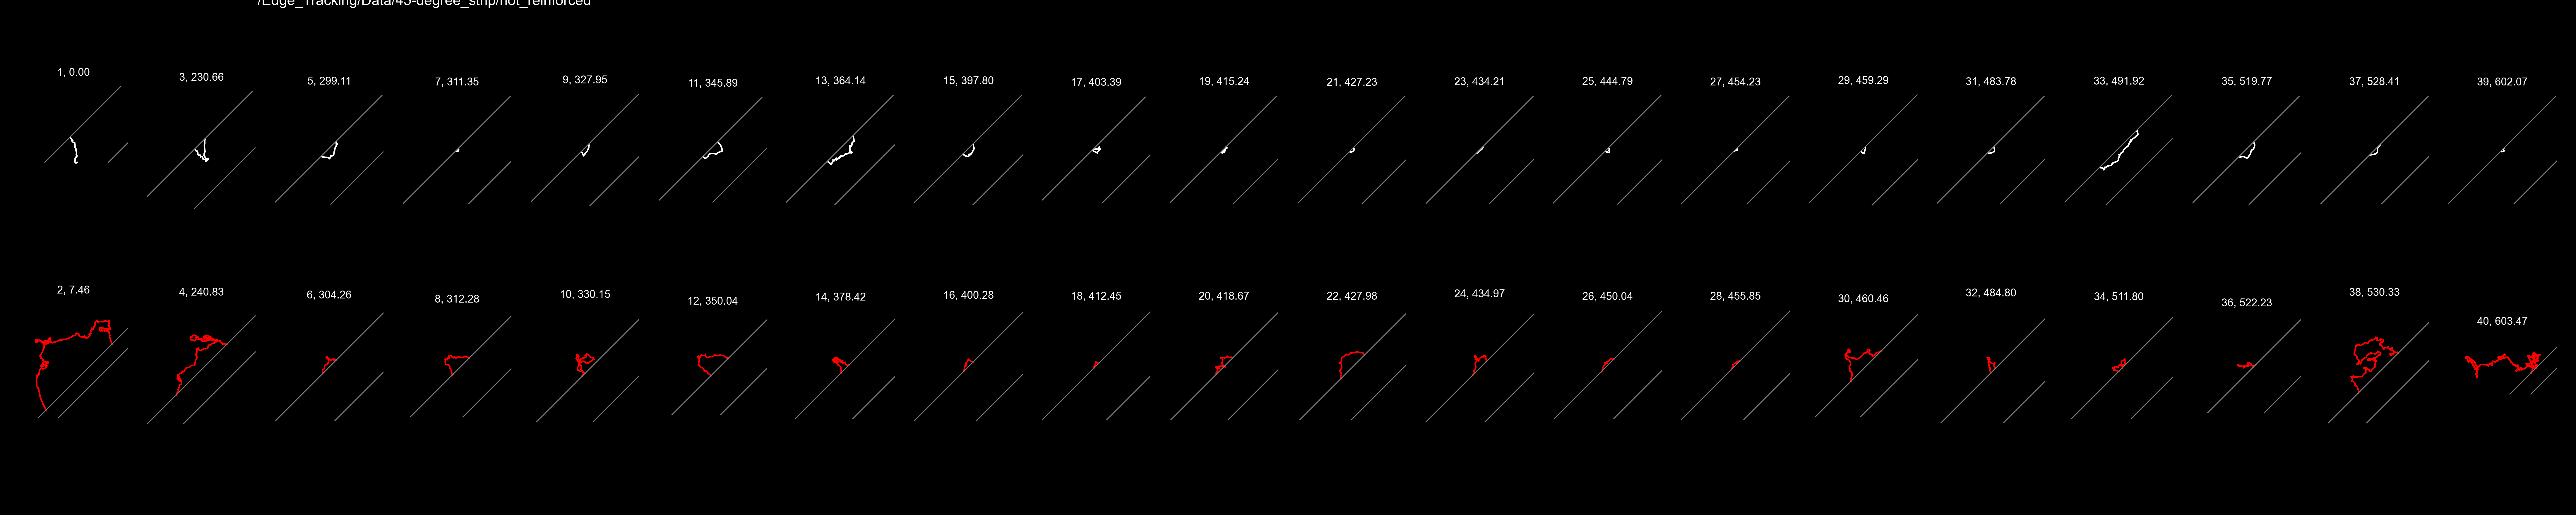

/Users/julianarhee/Documents/rutalab/data/figures/45deg_08202020-162923_45degOdor_split_in_out.png


In [234]:
nr=2
nc=20
figsize=(20, 4)
fig, axes = pl.subplots(nr, nc, figsize=figsize, dpi=200) #, sharey=True, sharex=True)
#for ax, onum in zip(axes.flat, outbouts):
ci=0
start_t = df.iloc[0]['time']
for bnum, boutdf_ in df.groupby('boutnum'):
    ri = 1 if bnum in outbouts else 0
    if bnum>1 and ((bnum-1) % 2) == 0:
        ci+=1
    ax=axes[ri, ci] #.flat[bnum-1]
    elapsed_t = boutdf_.iloc[0]['time'] - start_t
    title = '{}, {:.2f}'.format(bnum, elapsed_t)
    #if bnum in outbouts:
    color='r' if bnum in outbouts else 'w'
    sns.scatterplot(data=boutdf_, x='ft_posx', y='ft_posy', #hue=hue_varname,
                color=color, s=0.5, ax=ax, linewidth=0, alpha=1, legend=False) #'none')
    butil.plot_45deg_corridor(ax)
    ax.set_xlim([boutdf_['ft_posx'].min()-40, boutdf_['ft_posx'].max()+40])
    ax.set_ylim([boutdf_['ft_posy'].min()-40, boutdf_['ft_posy'].max()+40])
    ax.set_title(title, fontsize=6)
    #ax.set_box_aspect(1)
    ax.set_aspect('equal')
    ax.axis('off')
#     x = np.linspace(ax.get_xlim())
#     ax.plot(x, x)
# pl.subplots_adjust(hspace=0.3, wspace=0.3, bottom=0.1, top=0.9)
pl.tight_layout()


util.label_figure(fig, src_dir)


figpath = os.path.join(save_dir, '45deg_{}_split_in_out.png'.format(dfn))
pl.savefig(figpath)
print(figpath)

In [230]:
dfn = os.path.splitext(fpath.split('{}/'.format(condition))[1])[0]
dfn

'08202020-162923_45degOdor'

In [173]:
bout_thresh=0.5
df_=[]
for fi, fpath in enumerate(log_files):
    df0 = butil.load_dataframe(fpath, mfc_id=None) #')
    df0['fly_id'] = fi
    df0['fpath'] = fpath
    # parse and filter in and out bouts by min. duration 
    df0 = butil.parse_bouts(df0, count_varname='instrip', bout_varname='boutnum') # 1-count
    df0 = butil.filter_bouts_by_dur(df0, bout_thresh=bout_thresh, bout_varname='boutnum', 
                        count_varname='instrip', verbose=False)
    df_.append(df0)

In [174]:
#print(df0.shape)
DF = pd.concat(df_, axis=0)

#### filter out flies that don't do anything

In [196]:
nbouts_per_fly = dict((fi, len(df_[~df_['instrip']]['boutnum'].unique())) \
                       for fi, df_ in DF.groupby(['fly_id']))
nbouts_per_fly
incl_flies = [k for k, v in nbouts_per_fly.items() if v>2]
print("{} flies with >2 outbouts".format(len(incl_flies)))
max_nbouts = max(nbouts_per_fly.values())
max_nbouts

6 flies with >2 outbouts


/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_39620/4096105660.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  nbouts_per_fly = dict((fi, len(df_[~df_['instrip']]['boutnum'].unique())) \


28

In [211]:
mpl.rcParams['axes.linewidth'] = 0.1

<IPython.core.display.Javascript object>


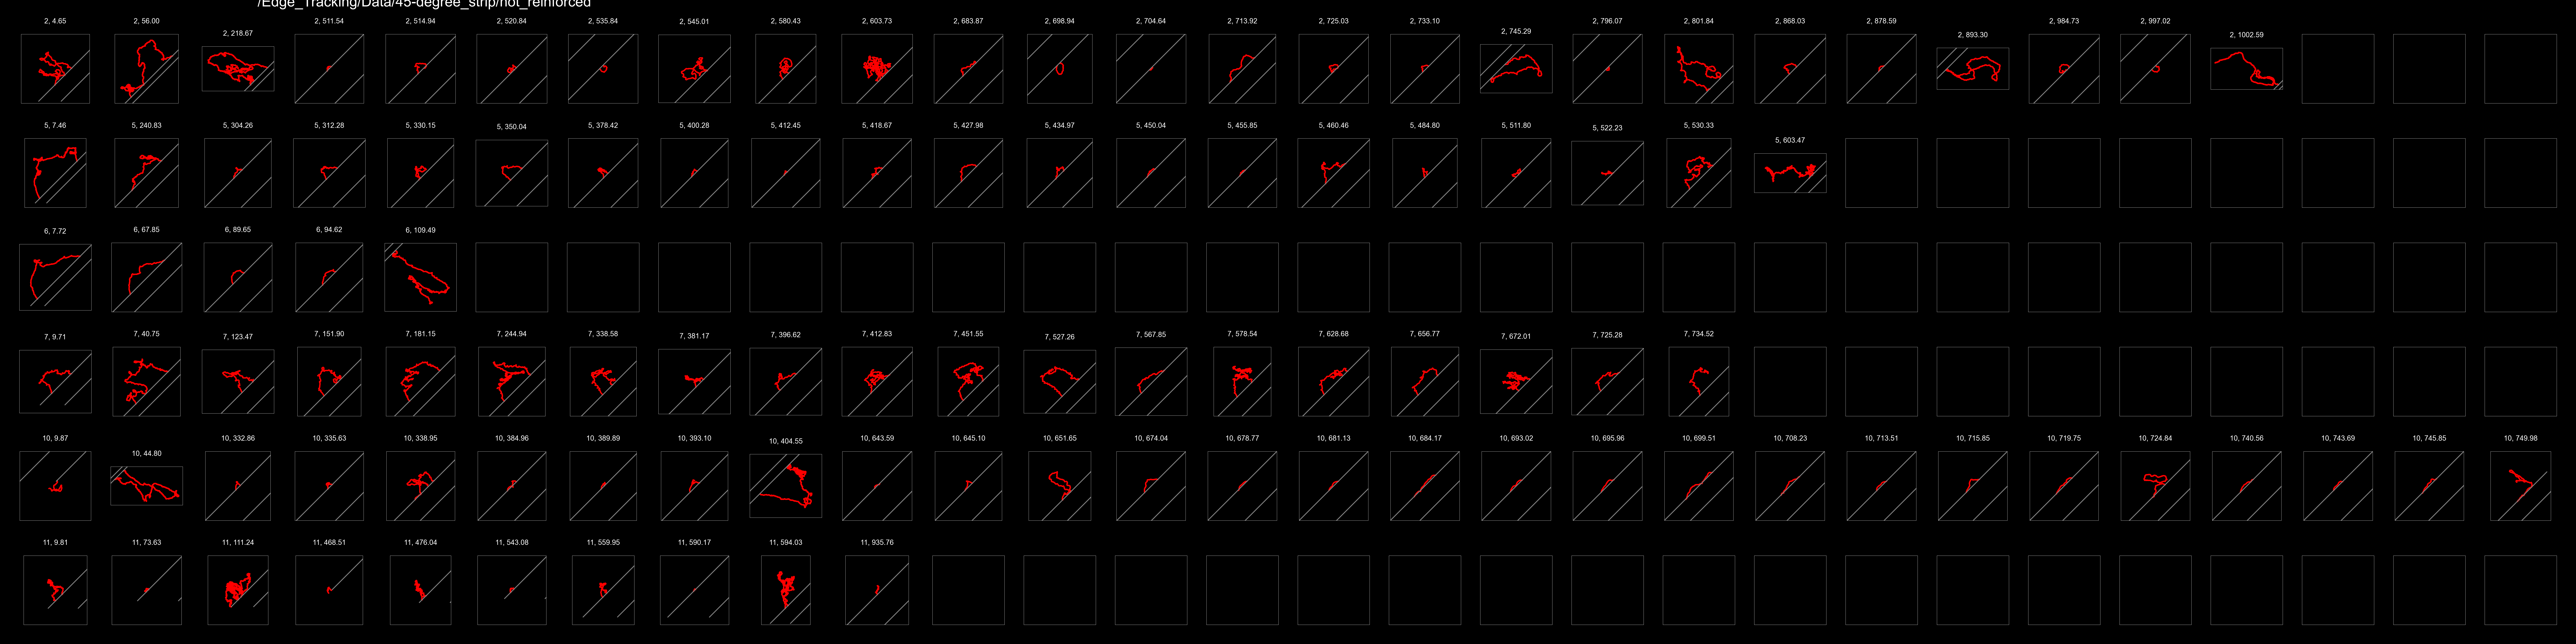

In [236]:
plotdf = DF[DF['fly_id'].isin(incl_flies)]
nr=len(incl_flies)
nc=max_nbouts
figsize=(20, 5)
fig, axes = pl.subplots(nr, nc, figsize=figsize, dpi=300) #, sharey=True, sharex=True)
#for ax, onum in zip(axes.flat, outbouts):
ci=0
last_fly=0; curr_fly=0;
for fi, ((fly_id, bnum), boutdf_) in enumerate(plotdf[~plotdf['instrip']].groupby(['fly_id', 'boutnum'])):
    ri = incl_flies.index(fly_id)
    if last_fly!=fly_id:
        start_t = plotdf[plotdf['fly_id']==fly_id].iloc[0]['time']
        ci=0
    else:
        ci+=1
    ax=axes[ri, ci] #.flat[bnum-1]
    
    elapsed_t = boutdf_.iloc[0]['time'] - start_t
    title = '{}, {:.2f}'.format(fly_id, elapsed_t)
    
    color='r' #if bnum in outbouts else 'w'
    sns.scatterplot(data=boutdf_, x='ft_posx', y='ft_posy', #hue=hue_varname,
                color=color, s=0.5, ax=ax, linewidth=0, alpha=1, legend=False) #'none')
    butil.plot_45deg_corridor(ax)
    ax.set_xlim([boutdf_['ft_posx'].min()-40, boutdf_['ft_posx'].max()+40])
    ax.set_ylim([boutdf_['ft_posy'].min()-40, boutdf_['ft_posy'].max()+40])
    ax.set_title(title, fontsize=4)
    ax.set_aspect('equal')
    last_fly=fly_id
for ax in fig.axes:
    ax.tick_params(axis='both', which='both', size=0, labelsize=0) #'off')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticks([]); ax.set_yticks([])
pl.tight_layout()

util.label_figure(fig, src_dir)

fpath = os.path.join(save_dir, '45deg_all_outbouts_v_time.png')
pl.savefig(fpath)

In [237]:
fly_id=5

In [257]:
#df = DF[DF['fly_id']==fly_id]

# figsize=(20, 5)
# fig, axes = pl.subplots(nr, nc, figsize=figsize, dpi=300) #, sharey=True, sharex=True)
# #for ax, onum in zip(axes.flat, outbouts):
# ci=0
# last_fly=0; curr_fly=0;
# for fi, ((fly_id, bnum), boutdf_) in enumerate(plotdf[~plotdf['instrip']].groupby(['fly_id', 'boutnum'])):
#     ri = incl_flies.index(fly_id)
dlist=[]
for bi, ((fly_id, boutnum), boutdf_) in enumerate(DF.groupby(['fly_id', 'boutnum'])):
    total_dist = np.nansum(np.linalg.norm(boutdf_[['ft_posx', 'ft_posy']].diff(axis=0), axis=1))
    df_= pd.DataFrame({
        'start_t': boutdf_.iloc[0]['time'],
        'end_t': boutdf_.iloc[-1]['time'],
        'total_dist': total_dist,
        'elapsed_t': boutdf_.iloc[-1]['time']-boutdf_.iloc[0]['time'],
        'fly_id': fly_id, 
        'boutnum': boutnum,
        'instrip': boutdf_['instrip'].unique()[0]
    }, index=[bi])
    dlist.append(df_)

In [260]:
durdf = pd.concat(dlist, axis=0)

In [267]:
#plotdf = durdf[durdf['fly_id']==5]
incl_flies

[2, 5, 6, 7, 10, 11]

<IPython.core.display.Javascript object>


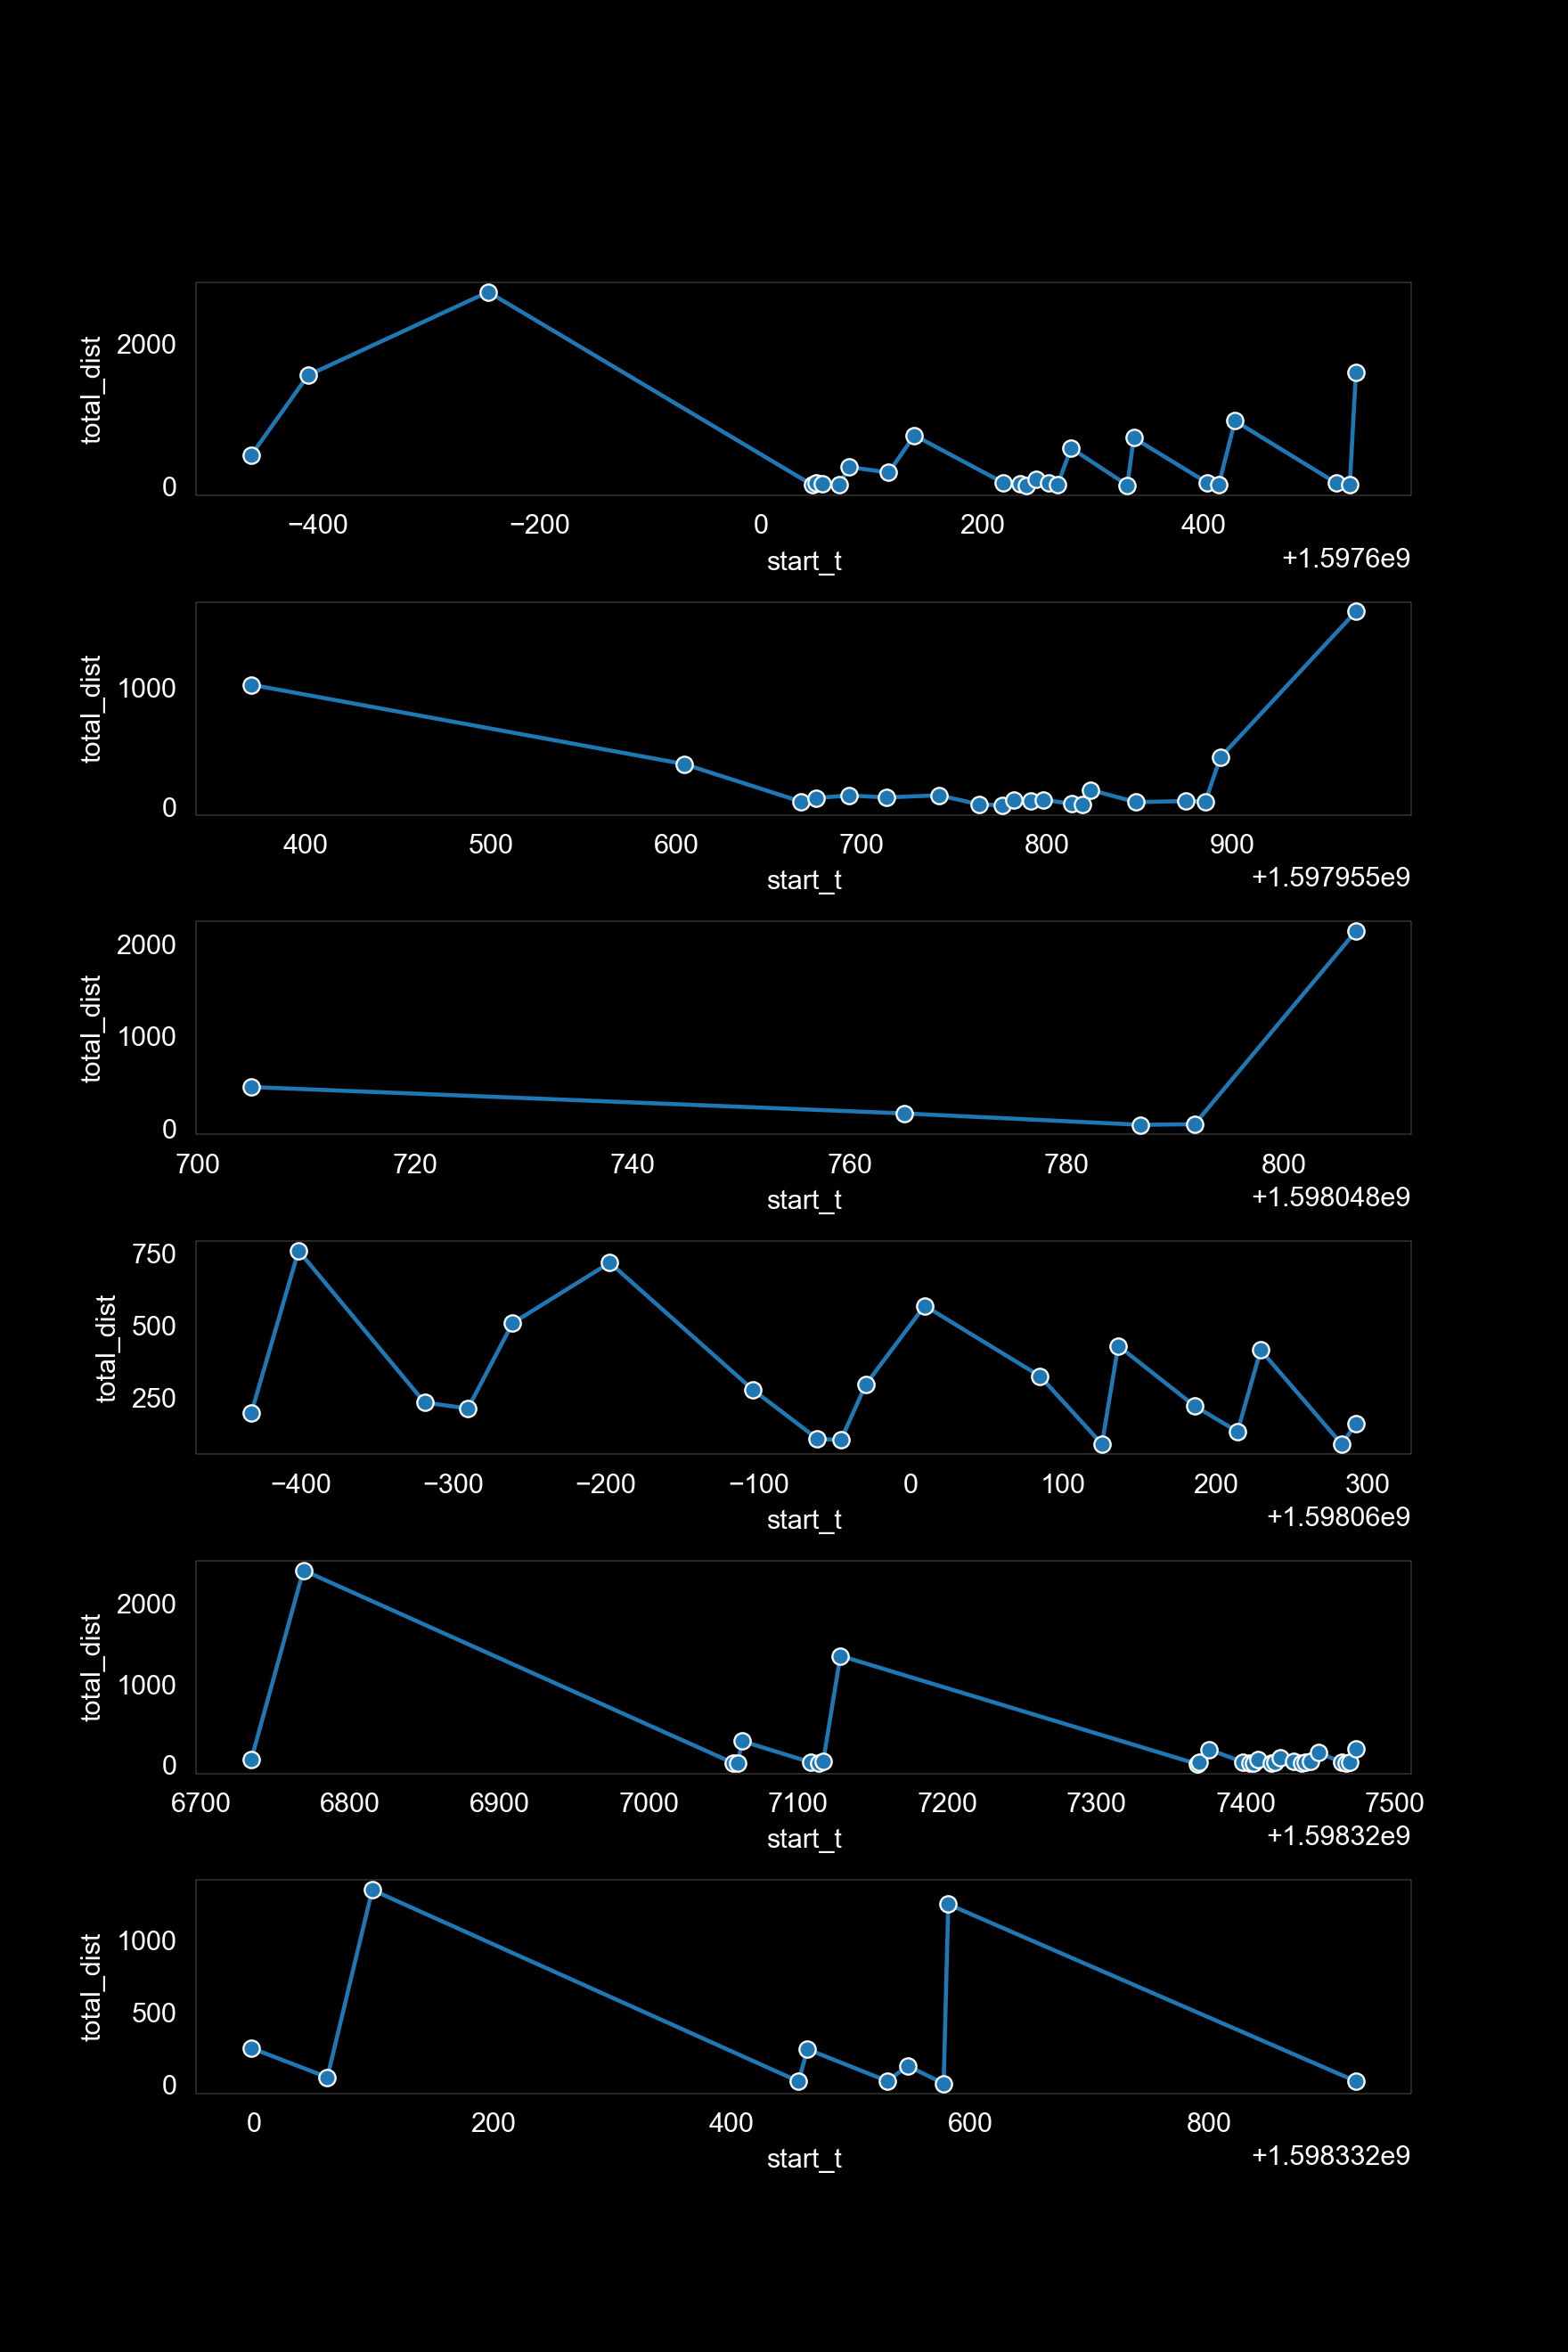

In [281]:
#g = sns.FacetGrid(durdf[durdf['instrip']], col='fly_id', col_wrap=4)
#g.map(sns.scatterplot, x='start_t', y='elapsed_t')
plotdf = durdf[durdf['fly_id'].isin(incl_flies)]
fig, axes = pl.subplots(len(incl_flies), 1, figsize=(8,12)) # sharex=True, sharey=True)
ai = 0
for fly_id, df_ in plotdf.groupby('fly_id'):
    ax = axes.flat[ai]
    sns.lineplot(x='start_t', y='total_dist', data=df_[~df_['instrip']], ax=ax,
                marker='o')
    #ax.plot()
    ai+=1
pl.subplots_adjust(wspace=0.5, hspace=0.5)

In [ ]:
# switch sides? only look when animal on top of odor?
# angle of entry -- if just going upwind when below odor strip, this should be vertical